# **Importing necessary libraries**

In [ ]:
import numpy as np  # For numerical computations
import pandas as pd  # For data manipulation and analysis
from sklearn.datasets import load_breast_cancer  # For loading the breast cancer dataset (preloaded dataset)
import seaborn as sns  # For data visualization
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets

Suppress warnings for a cleaner output

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# **Read the data and Convert it to DataFrame**

In [ ]:
# Load the breast cancer dataset into a variable
data = load_breast_cancer()

In [ ]:
# Display the keys in the dataset to understand its structure
# These keys include metadata, feature names, and the target variable
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
# View a detailed description of the dataset for better understanding
# The description includes information about the features and the dataset itself
data.DESCR.split('\n')

['.. _breast_cancer_dataset:',
 '',
 'Breast cancer wisconsin (diagnostic) dataset',
 '--------------------------------------------',
 '',
 '**Data Set Characteristics:**',
 '',
 ':Number of Instances: 569',
 '',
 ':Number of Attributes: 30 numeric, predictive attributes and the class',
 '',
 ':Attribute Information:',
 '    - radius (mean of distances from center to points on the perimeter)',
 '    - texture (standard deviation of gray-scale values)',
 '    - perimeter',
 '    - area',
 '    - smoothness (local variation in radius lengths)',
 '    - compactness (perimeter^2 / area - 1.0)',
 '    - concavity (severity of concave portions of the contour)',
 '    - concave points (number of concave portions of the contour)',
 '    - symmetry',
 '    - fractal dimension ("coastline approximation" - 1)',
 '',
 '    The mean, standard error, and "worst" or largest (mean of the three',
 '    worst/largest values) of these features were computed for each image,',
 '    resulting in 30 feature

In [ ]:
# Convert the dataset into a Pandas DataFrame
# The 'data' key contains the feature values
df = pd.DataFrame(data=data['data'], columns=data.feature_names)

In [ ]:
# Add the target column to the DataFrame
# The 'target' key represents the labels (malignant/benign)
df['target'] = data['target']

> `df['target']` = `data['target']`: Adds the target variable to the DataFrame, enabling analysis of features alongside their corresponding labels.

In [ ]:
# Display the first five rows of the DataFrame to confirm the structure
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
# Get a concise summary of the DataFrame
# This includes column names, data types, and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

# **Check Null**

In [ ]:
# Check for missing values in the DataFrame
# .isnull() identifies NaN (missing) values, and .sum() aggregates the count of missing values per column
df.isnull().sum()

,0
mean radius,0
mean texture,0
mean perimeter,0
mean area,0
mean smoothness,0
mean compactness,0
mean concavity,0
mean concave points,0
mean symmetry,0
mean fractal dimension,0


# **Split Data (X,Y)**

In [ ]:
# Separate the features (X) and the target variable (y)
# X contains all columns except the 'target' column
x = df.drop(['target'], axis=1)

# y contains only the 'target' column, representing labels
y = df['target']

# **Check Balance**

In [ ]:
# Count the occurrences of each class in the target variable
# This gives an overview of whether the dataset is balanced or imbalanced
df['target'].value_counts()

,count
target,
1,357
0,212


<Axes: xlabel='target', ylabel='count'>

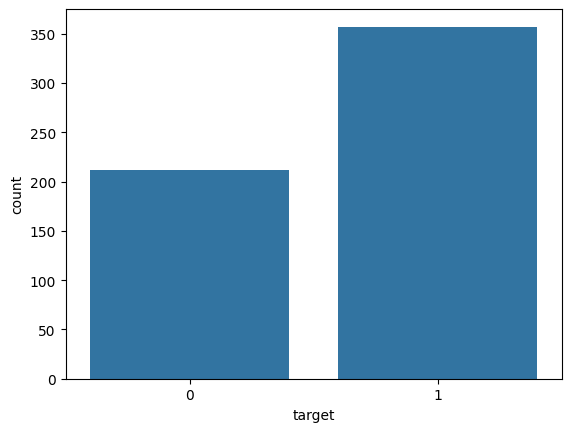

In [ ]:
# Visualize the class distribution using a count plot
# Provides a graphical representation of the balance between classes
sns.countplot(x='target', data=df)

# **Handle Data if UN-Balanced**

In [ ]:
# Import the SMOTE (Synthetic Minority Oversampling Technique) for balancing the dataset
from imblearn.over_sampling import SMOTE

In [ ]:
# Initialize SMOTE with specific parameters
# 'sampling_strategy' determines the percentage of resampling for the minority class
# 'k_neighbors' specifies the number of nearest neighbors used to generate synthetic samples
smote = SMOTE(sampling_strategy='minority', k_neighbors=5)

In [ ]:
x_resampled, y_resampled = smote.fit_resample(x, y)

# **Split Data (Train, Test)**

In [ ]:
# Split the resampled data into training and testing sets
# 'test_size=0.2' allocates 20% of the data for testing and 80% for training
# 'random_state=42' ensures reproducibility by controlling the random shuffling
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=42)

# **Scaling Data**

In [ ]:
# Import StandardScaler for feature scaling
from sklearn.preprocessing import StandardScaler

In [ ]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
# This standardizes the features to have a mean of 0 and a standard deviation of 1
x_train = scaler.fit_transform(x_train)

# Transform the test data using the same scaler
# This ensures the test data is scaled based on the training data statistics
x_test = scaler.transform(x_test)

# **Build Perceptron from Scratch**

## Activation Function

In [ ]:
def sigmoid(X):
    return 1 / (1 + np.exp(-X))

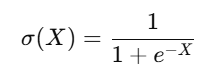

> The sigmoid function is used to map linear predictions into probabilities between 0 and 1.
> This helps in binary classification by converting the output into a range interpretable as probabilities.


## Prepare Perceptron

In [ ]:
def perceptron(X, weights, bais):
    # Compute the linear prediction using weights and bias
    linear_prediction = np.dot(X, weights) + bais

    # Apply the sigmoid activation function
    y_pred = sigmoid(linear_prediction)

    # Convert probabilities into binary class predictions
    y_p = [1 if y >= 0.5 else 0 for y in y_pred]

    return y_p

**Implements the perceptron algorithm for binary classification.**
 * Calculate the linear combination of inputs using np.dot(X, weights) + bais.
 * Apply the sigmoid activation to compute probabilities.
 * Convert probabilities into binary predictions using a threshold (0.5).



## **Assessment** 🔥

Implementing Weight and Bias Updates

**Task Overview**
* Now that we've built the perceptron up to the Prepare Perceptron step, it's time for you to complete two crucial functions:
  1. **Updating Weights** using gradient descent.
  2. **Updating Bias to** improve model performance.

* Your task is to fill in the missing parts of the functions below.

### **Task 1: Implement the update_weights Function**

* Complete the function update_weights to update the weights based on the predicted and actual outputs.

**Hint for update_weights:**
 * The update follows gradient descent:
 * Use np.dot() for matrix multiplication.
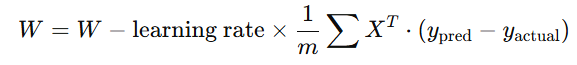

In [ ]:
def update_weights(weights, X, y_pred, y_actual, lr):
    """
    Updates the weights using gradient descent.

    Parameters:
    - weights: Current weight vector
    - X: Input feature matrix
    - y_pred: Predicted outputs
    - y_actual: Actual target values
    - lr: Learning rate

    Returns:
    - Updated weights
    """
    # YOUR CODE HERE
    error = y_pred - y_actual
    gradient = np.dot(X.T, error) / len(X)
    updated_weights = weights - lr * gradient

    return updated_weights

    #pass  # Remove this after implementing

### **Task 2: Implement the update_bias Function**

* Now, implement update_bias to adjust the bias term

**Hint for update_bias:**
 * The bias update follows the rule:
 * np.sum() is helpful for summing up values.
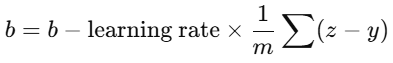

In [ ]:
def update_bias(bias, X, z, y, lr):
    """
    Updates the bias term using gradient descent.

    Parameters:
    - bias: Current bias value
    - X: Input feature matrix
    - z: Linear combination of weights and inputs
    - y: Actual target values
    - lr: Learning rate

    Returns:
    - Updated bias
    """
    # YOUR CODE HERE
    error = z - y
    gradient = np.sum(error) / len(X)
    bias_new = bias - lr * gradient

    return bias_new

    #pass  # Remove this after implementing

## Accuracy Calculation

In [ ]:
def accuarcy(y_pred, y_actual):
    # Calculate the accuracy as the ratio of correct predictions to total samples
    return np.sum(y_pred == y_actual) / len(y_actual)

* Measures the performance of the perceptron by comparing predicted labels **(y_pred)** with actual labels **(y_actual)**.

## **General Overview of the Perceptron Workflow**

1. **Activation Function `(sigmoid)`**
 * Converts the linear prediction into probabilities.

2. **Perceptron Function**
 * Performs the forward pass, applying weights, biases, and activation function to predict the output.

3. **Weight Update**
 * Uses gradient descent to minimize the error in predictions by adjusting weights.

4. **Bias Update**
 * Similar to weight update, adjusts the bias to reduce prediction errors.

5. **Accuracy Calculation**
 * Evaluates how well the perceptron predicts by comparing predictions with actual values.






# **Training and Evaluation**

## Training the Perceptron

In [ ]:
# Get the shape of training data
x_train.shape

(571, 30)

In [ ]:
# Define the learning rate
lr = 0.001

* **lr**: A small learning rate to control the size of updates during training.

In [ ]:
# Initialize weights as zeros (one weight per feature)
weights = np.zeros(x_train.shape[1])  # 30 weights for 30 features

* **weights**: A zero vector with a size equal to the number of features (30 in this dataset).

In [ ]:
# Initialize the bias term as zero
bais = 0

* **bais**: A scalar initialized to zero.

**Training Loop**

In [ ]:
# Train the perceptron over 1000 iterations (epochs)
for i in range(1000):
    # Make predictions using the current weights and bias
    pred = perceptron(x_train, weights, bais)

    # Update weights using gradient descent
    weights = update_weights(weights, x_train, pred, y_train, lr)

    # Update bias using gradient descent
    bais = update_bais(bais, x_train, pred, y_train, lr)

* **Iterates 1000 times (epochs) to adjust the weights and bias gradually.**
  * **Steps**
   1. Predictions (pred) are made using the current weights and bias.
   2. Weight Update:
     * Adjusts weights to minimize the error between predictions and actual values (y_train).
   3. Bias Update:
     * Adjusts the bias term similarly to reduce prediction error.


   




**Outputs**

In [ ]:
# Display the trained weights
weights

array([ 1.16611041e-04,  5.37812174e-06,  1.39057581e-04, -5.19232768e-05,
       -4.81974648e-05,  3.22929388e-04, -2.24620327e-04, -1.69371490e-04,
        4.91752009e-05, -7.00276435e-05, -2.28918126e-04,  5.12658066e-05,
        1.93795570e-04, -1.92647159e-04, -9.01118178e-07, -7.27111746e-05,
        2.17893962e-04, -2.21132521e-04,  6.35767956e-05,  1.51484439e-04,
       -2.02799737e-04, -1.29683365e-04, -9.72740827e-05, -2.50264104e-04,
       -1.16799346e-07, -8.08718687e-05, -6.68638945e-05,  2.79424374e-05,
       -1.03429786e-04, -4.51181236e-05])

In [ ]:
# Display the trained bias
bais

-0.00024518388791593636

* Trained weights and bais represent the learned parameters of the perceptron after training.


## Evaluation

In [ ]:
# Evaluate the perceptron on testing data
y_pred = perceptron(x_test, weights, bais)
print("Accuracy on Testing Data: ", accuarcy(y_pred, y_test))

Accuracy on Testing Data:  0.965034965034965
